Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.2s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ........C=0.1, epsilon=0.1, gamma=scal

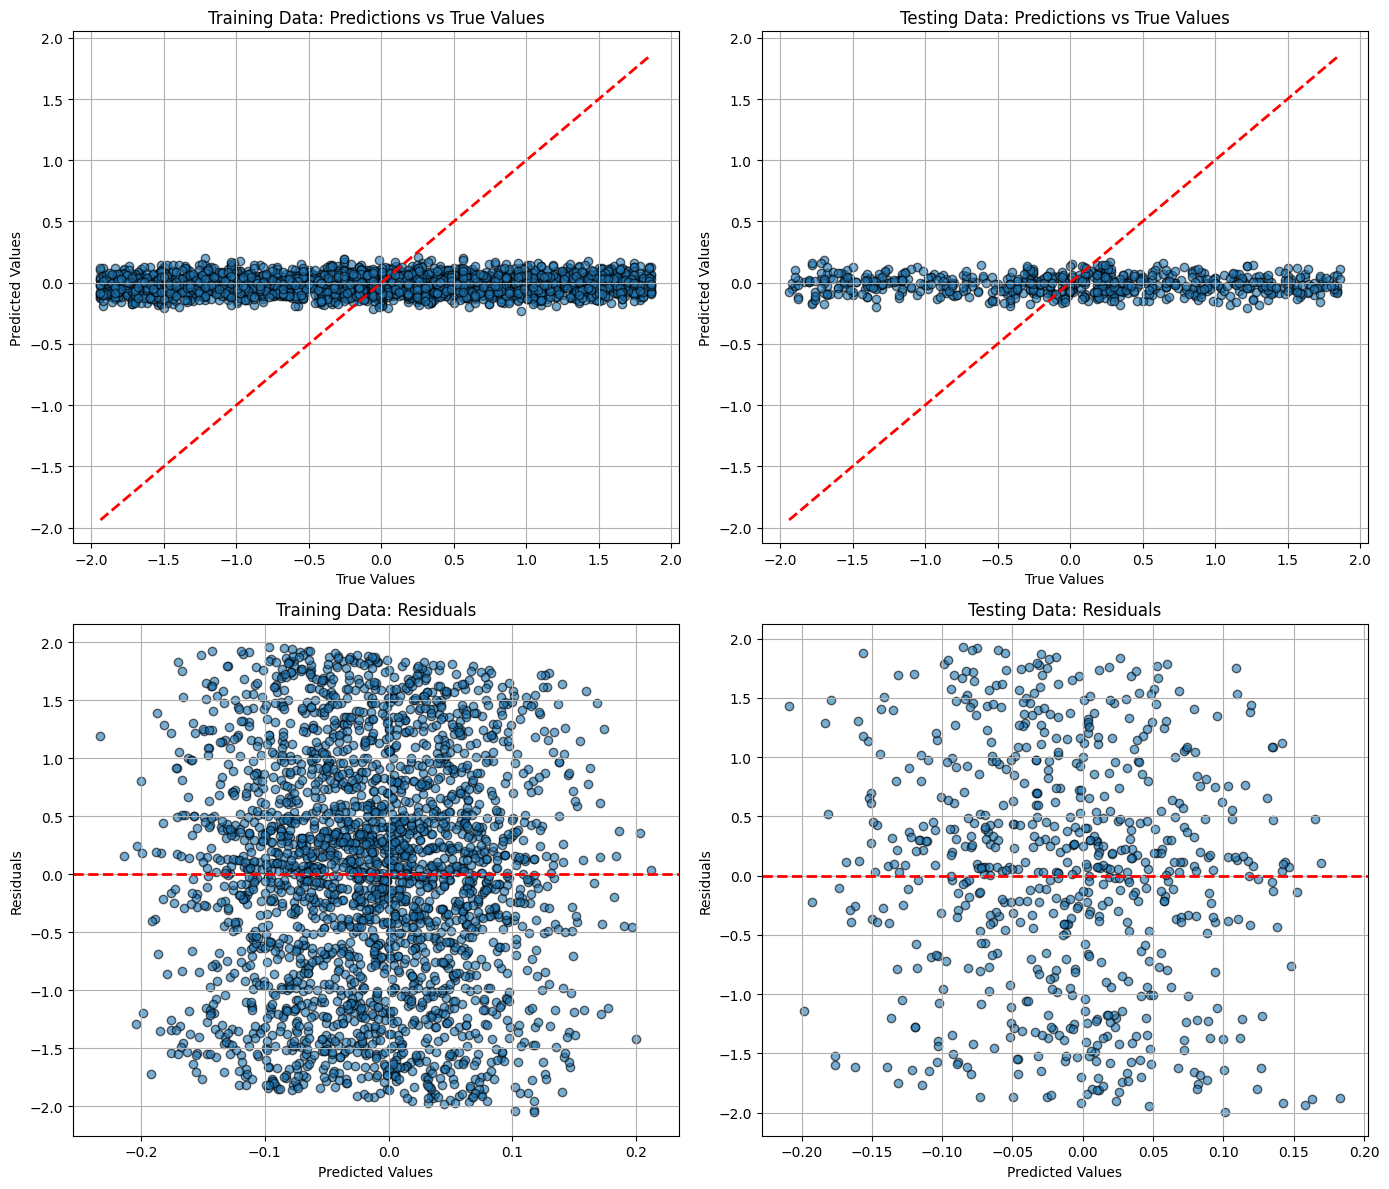

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the processed dataset
file_path = 'Processed_Fashion_Retail_Sales.csv'
data = pd.read_csv(file_path)

# Define features and target
features = ['Year', 'Month', 'Weekday', 'Item Purchased Encoded', 'Payment Method Encoded', 'Review Rating']
target = 'Standardized Purchase Amount (USD)'

X = data[features]
y = data[target]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance with SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVR model
svr = SVR()

# Hyperparameter tuning using Grid Search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on training and testing data
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

# Create a table of results for training and testing sets
results = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'R-squared'],
    'Training Set': [rmse_train, mse_train, mae_train, r2_train],
    'Testing Set': [rmse_test, mse_test, mae_test, r2_test]
})

# Display the table
print("Model Performance Results")
print(results)

# Print the results
print("Best Parameters:", best_params)
print("Training Metrics -> R-squared:", r2_train, ", MAE:", mae_train, ", MSE:", mse_train, ", RMSE:", rmse_train)
print("Testing Metrics -> R-squared:", r2_test, ", MAE:", mae_test, ", MSE:", mse_test, ", RMSE:", rmse_test)

# Plot predictions vs true values and residuals
def plot_predictions(y_true, y_pred, title, ax):
    ax.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=2)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(title)
    ax.grid(True)

def plot_residuals(y_true, y_pred, title, ax):
    residuals = y_true - y_pred
    ax.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
    ax.axhline(0, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")
    ax.set_title(title)
    ax.grid(True)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plot_predictions(y_train, y_train_pred, "Training Data: Predictions vs True Values", axes[0, 0])
plot_predictions(y_test, y_test_pred, "Testing Data: Predictions vs True Values", axes[0, 1])
plot_residuals(y_train, y_train_pred, "Training Data: Residuals", axes[1, 0])
plot_residuals(y_test, y_test_pred, "Testing Data: Residuals", axes[1, 1])

plt.tight_layout()
plt.show()
